In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
from numpy import amin, amax, ravel
import numpy.ma as ma
import pandas as pd

def get_eg_matrix(filename):
    value_eg = {}
    df = pd.read_csv(filename)
    eg = np.zeros( (4, size_right, size_left, size_bottom) )
    number = 0
    for a in range(size_left):
        for b in range(size_bottom):
            for c in range(size_right):
                for d in range(4):
                    compound = A_list[a]+'2'+B1_list[c]+'1'+B2_list[b]+'1'+X_list[d]+'6'
                    if compound in df['compound'].tolist():
                        eg[d][c][a][b] = df[df['compound'] == compound]['Eg_direct_bs'].values[0]
                        number +=1
                    else:
                        eg[d][c][a][b] = 1000
    print('the total number of compounds is {}'.format(number))
    return eg


In [115]:
A_list = ['Li','Na','K','Rb','Cs']
B1_list = ['Li','Na','K','Rb','Cs', 'Cu','Ag','Au','Hg','In','Tl']
#B2_list = ['Sc', 'Y', 'Ti','V','Nb','Ta','Cr','Mo','Mn','Fe','Ru','Co','Rh','Ir',\
#           'Ni','Pd','Au','Al','Ga','In','Tl','As','Sb','Bi']
B2_list = ['Sc', 'Y', 'Al','Ga','In','Tl','As','Sb','Bi'] ##not including transition metals
X_list = ['F','Cl','Br','I']
size_left = len(A_list)
size_right = len(B1_list)
size_bottom = len(B2_list)

filename = '/Users/yao/Google Drive/data/2116/data/df_for_draw'
eg = get_eg_matrix(filename)

import numpy.ma as ma
masked_eg = ma.masked_where(eg==1000, eg) ###########


the total number of compounds is 41


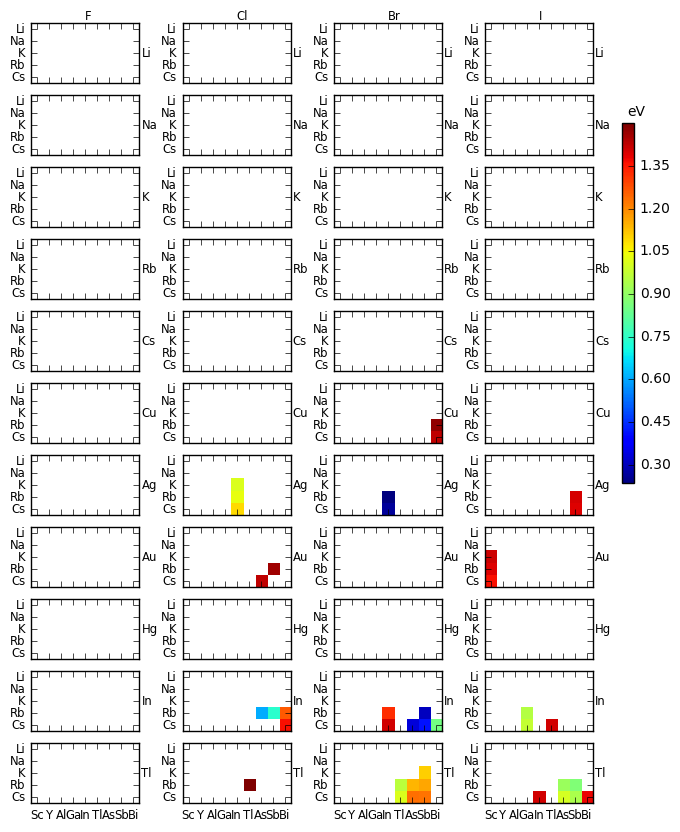

In [116]:
fig = figure(figsize=(6,4))
#cmap = cm.cool
w = 0.21
h = 0.15
ax = []
images = []
vmin = 1e40
vmax = -1e40
cax = fig.add_axes([1, 1, 0.02, 0.9])

for j in range(4):
    for i in range(size_right):
        pos = [0+j*1.2*w , 2 - i*1.2*h, w, h]
        a = fig.add_axes(pos)
        plt.xticks(np.arange(size_bottom),[])
        plt.yticks(np.arange(size_left), [])
        if i == size_right-1: 
            plt.xticks(np.arange(size_bottom), B2_list, size='small')

        plt.yticks(np.arange(size_left), A_list, size='small')
            
            
        dd = ravel(masked_eg[j][i])
        # Manually find the min and max of all colors for
        # use in setting the color scale.
        vmin = min(vmin, amin(dd))
        vmax = max(vmax, amax(dd))
        images.append(a.imshow(masked_eg[j][i],interpolation = 'nearest',aspect=1))

        ax.append(a)
    
# Set the first image as the master, with all the others
# observing it for changes in cmap or norm.

class ImageFollower:
    'update image in response to changes in clim or cmap on another image'
    def __init__(self, follower):
        self.follower = follower
    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))
fig.colorbar(images[0], cax)
axes(ax[0])     # Return the current axes to the first one,
sci(images[0])  # because the current image must be in current axes.

#rect = fig.patch
#rect.set_facecolor('white')

for i in range(size_right*4):
    ax[i].text(1.02, 0.45, B1_list[i%size_right],size='small',transform=ax[i].transAxes)
for i in range(4):
    ax[i*size_right].text(0.5, 1.06, X_list[i], size='small',transform=ax[i*size_right].transAxes)


cax.text(0.4, 1.02, "eV",size=10,transform=cax.transAxes)
#ax[0].text(-0.16, 1.1, "a", size=13,transform=ax[0].transAxes)
plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/41comp_promising.pdf', dpi=300, bbox_inches="tight")
plt.show()